In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA

from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

In [8]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1].reshape(-1,1)



In [9]:
print('Dataset features before selection',X.shape)

Dataset features before selection (6000, 10)


# SelectKBest & SelectPercentile

In [10]:
#performing selectKBest
X_new1 = SelectKBest(chi2, k=5).fit_transform(X, Y) #Save 5 feature columns instead of 10

#performing selectPercentile
X_new2 = SelectPercentile(f_classif, percentile=50).fit_transform(X, Y) #selecting 50 percent of data using f_classif
                                                                #ANOVA F-value between label/feature for classification tasks.

In [11]:
print('Dataset features after selection',X_new1.shape)
print('Dataset features after selection',X_new2.shape)

Dataset features after selection (6000, 5)
Dataset features after selection (6000, 5)


In [12]:
#Save the arrays 
#for selectKbest
data_kBest = np.concatenate((X_new1, Y),axis=1)
np.save('data_kBest',data_kBest)

#for selectPercentile
data_select_percentile = np.concatenate((X_new2, Y),axis=1)
np.save('data_select_percentile',data_select_percentile)
print(data_kBest.shape)
print(data_select_percentile.shape)


(6000, 6)
(6000, 6)


# PCA

In [35]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1].reshape(-1,1)
print('Dataset features before selection',X.shape)

Dataset features before selection (6000, 10)


[3.27680859e-01 2.41093055e-01 1.65844518e-01 1.08386610e-01
 7.68757616e-02 6.58319604e-02 9.09786686e-03 2.71480321e-03
 2.47456519e-03 6.52247764e-33]


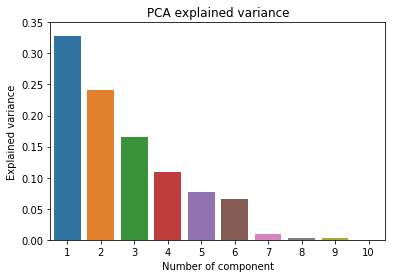

In [39]:
#First do PCA keeping exactly same features as the original data

pca = PCA(n_components=10) 

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None, svd_solver='auto', tol=0.0, whiten=False) 

X_pca =pca.fit_transform(X)
xs = [i for i in range(1,11)]
ax = sns.barplot(x =xs, y = pca.explained_variance_ratio_)

ax.set(title = 'PCA explained variance',ylabel='Explained variance', xlabel='Number of component')
ax.set_ylim((0, 0.35))

print(pca.explained_variance_ratio_) 


(0, 0.35)

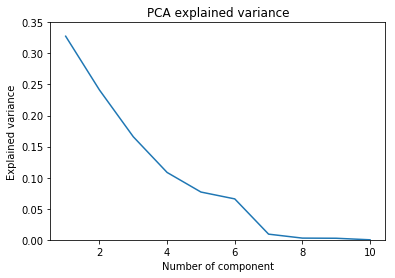

In [40]:
ax = sns.lineplot(x =xs, y = pca.explained_variance_ratio_)

ax.set(title = 'PCA explained variance',ylabel='Explained variance', xlabel='Number of component')
ax.set_ylim((0, 0.35))

In [37]:

pca = PCA(n_components=5) 

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None, svd_solver='auto', tol=0.0, whiten=False) 



X_pca =pca.fit_transform(X) 
print(pca.explained_variance_ratio_) 
print(pca.singular_values_) 

print('Dataset features after selection',X_pca.shape)

[0.32768086 0.24109305 0.16584452 0.10838661 0.07687576]
[40.03546613 34.34090233 28.48196264 23.02539926 19.39161893]
Dataset features after selection (6000, 5)


In [38]:
#for selectPercentile
data_pca = np.concatenate((X_pca, Y),axis=1)
np.save('data_pca',data_pca)
print(data_pca.shape)

(6000, 6)
